## 1. Getting Started
At first you should install reuirements using `requirements.txt` file. After That you need to clone the files in `alignOT` folter and put it in the same folder as your code. Commands for this step are included in the `README` as well. After that you should import `utils.py` file.

In [1]:
from utils import *

%matplotlib notebook
plt.rcParams["figure.figsize"] = (7,5)

1*q0^1 + (-1*q1^1)i + (-1*q2^1)j + (-1*q3^1)k
1*q0^1 + (1*q1^1)i + (1*q2^1)j + (1*q3^1)k
0*q0^1q3^1 + 0*q1^1q3^1 + 0*q2^1q3^1 + (1*q1^2 + 2*q1^1q2^1 + 2*q1^1q3^1 + 1*q0^2 + 2*q0^1q2^1 + -2*q0^1q3^1 + -1*q3^2 + -1*q2^2)i + (2*q1^1q2^1 + 1*q2^2 + 2*q2^1q3^1 + 1*q0^2 + 2*q0^1q3^1 + -2*q0^1q1^1 + -1*q1^2 + -1*q3^2)j + (2*q1^1q3^1 + 2*q2^1q3^1 + 1*q3^2 + 1*q0^2 + 2*q0^1q1^1 + -2*q0^1q2^1 + -1*q2^2 + -1*q1^2)k


## 2. Load The Maps
After that you should load and sample the maps.

In [2]:
x, y, z = sample('Data/emd_1717.map', 72, 500)

# def sample(fname, th, num):
#
#
# input:
# fname shows name and address of the mrc file
# th is the thresholding parameter for the topology representing network
# num is the number of points you want
#
# output:
# x, y, z are lists with len(x)=len(y)=len(z)=num
# and (x[i], y[i], z[i]) shows the 3d coordinates of the i-th sampled point

128
(128, 128, 128)
0
400
800
1200
1600
2000
2400
2800
3200
3600


<IPython.core.display.Javascript object>


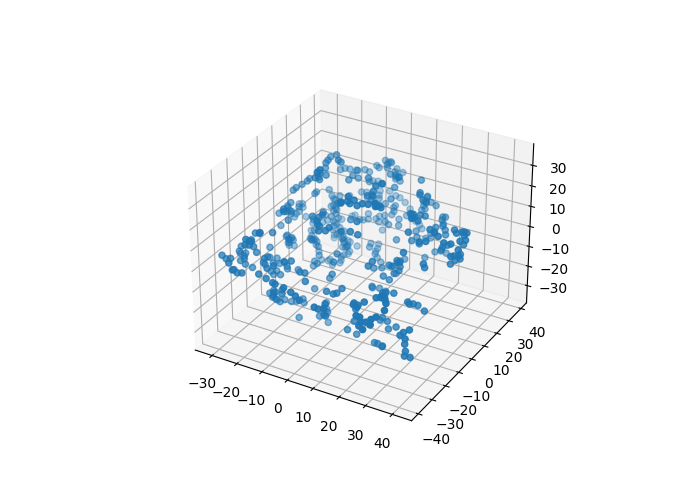

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d', adjustable='box')
ax.scatter(x, y, z,  marker='o')
plt.show()

Do the same for the second map.

128
(128, 128, 128)
0
400
800
1200
1600
2000
2400
2800
3200
3600


<IPython.core.display.Javascript object>


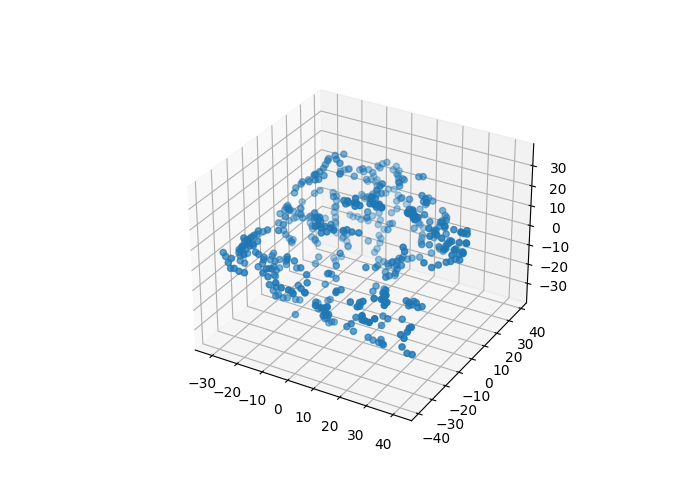

In [4]:
xr, yr, zr = sample('Data/emd_1717.map', 72, 500)

fig = plt.figure()
ax = fig.gca(projection='3d', adjustable='box')
ax.scatter(xr, yr, zr,  marker='o')
plt.show()

(optional) you can apply a rotation on these point clouds if you want.

In [5]:
xr, yr, zr = perform(xr, yr, zr, get_quaternion_vals(30 * math.pi /180, 0, 1, 0))

<IPython.core.display.Javascript object>


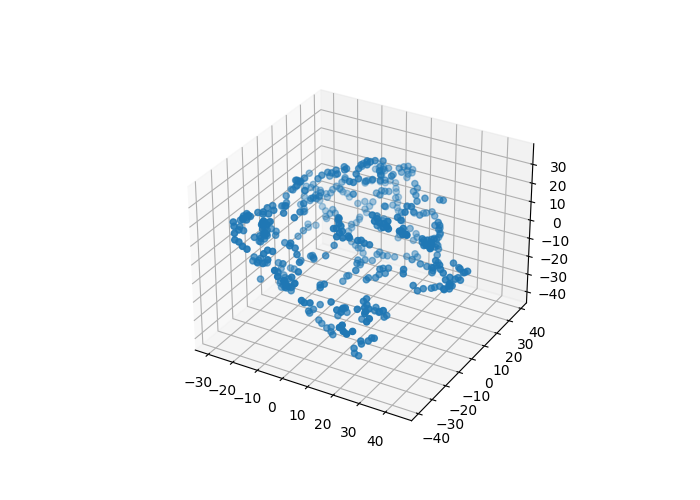

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d', adjustable='box')
ax.scatter(xr, yr, zr,  marker='o')
plt.show()

## 3. Run alignOT
In the next step you should run `alignOT` on the prepared data.

In [7]:
quartenions, costs = SGD(x, y, z, xr, yr, zr, lr=0.00001, max_iter=500, reg=30, num_samples=1)

9
133.3320074034182
19
130.45148231364536
29
125.84913273424763
39
125.14955680525502
49
123.71079974680916
59
120.21227208813768
69
119.09563960460257
79
115.00598242612736
89
111.40472078646083
99
110.5444425593144
109
107.79733146834492
119
104.71909608798151
129
106.61746003752184
139
105.80379338187457
149
104.89651064732588
159
102.86828869344461
169
101.86863046432796
179
100.4363319449546
189
98.2240225392509
199
97.24851811322459
209
94.39832910144052
219
94.23534263301805
229
93.08117359574321
239
91.28871153194122
249
89.45844332787235
259
87.70069314598273
269
84.67385061966785
279
82.15652729206691
289
80.4079226343982
299
78.83046833207638
309
76.98084911084011
319
74.81755878658039
329
74.11558992276449
339
74.00432904828543
349
73.63505290030221
359
73.2494583005126
369
72.72289683814938
379
72.1548781104021
389
72.39088228529569
399
71.8439286500588
409
71.49921172199637
419
71.31100921572387
429
71.27698256254507
439
71.11524539214601
449
71.00195840874792
459
71.3087

## 4. Analyze The Outputs

The final found quaternion is:
[0.9671999174149196, 0.011906789890877756, 0.25105571533641546, -0.03679097584989589]
The ideal quaternion is:
[0.9659258262890683, 0.0, 0.1830127018922193, 0.1830127018922193]
The angle difference is 4.52 degree(s).


<IPython.core.display.Javascript object>


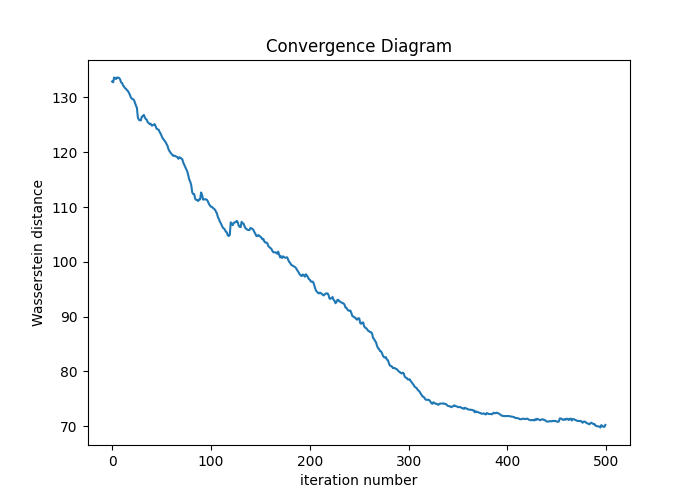

<IPython.core.display.Javascript object>


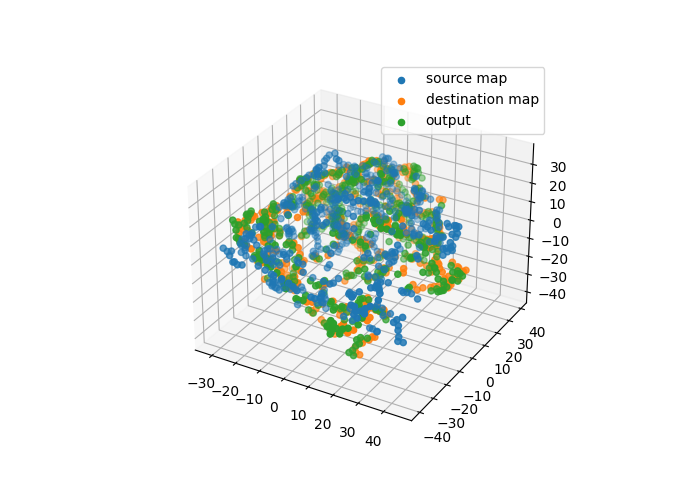

In [9]:
print("The final found quaternion is:")
print(quartenions[-1])
print("The ideal quaternion is:")
print(get_quaternion_vals(math.pi/6, 0, 1, 1))
print("The angle difference is %0.2f degree(s)."%(diff_quaternions(quartenions[-1], get_quaternion_vals(math.pi/6, 0, 1, 0)),))


fig, ax = plt.subplots()
plt.title('Convergence Diagram')
plt.xlabel('iteration number')
plt.ylabel('Wasserstein distance')
plt.plot(costs)
plt.show()

x_fin, y_fin, z_fin = perform(x, y, z, quartenions[-1])

fig = plt.figure()
ax = fig.gca(projection='3d', adjustable='box')
ax.scatter(x, y, z, c='C0',  marker='o', label='source map')
ax.scatter(xr, yr, zr, c='C1', marker='o', label='destination map')
ax.scatter(x_fin, y_fin, z_fin, c='C2',  marker='o', label='output')
plt.legend()
plt.show()